# Colorspace plots for the uncalibrated and calibrated XKCD Models

To give a visual demonstration of what calibration is doing, the heatmaps for the two versions of the models are shown.

Definitions:
- XKCD model: 
    + the xkcd model that computes the applicability (labeled as `phi`) of a color word to a color patch as well as the P(color word | color patch)
- Uncalibrated XKCD Model: 
    + the initially trained XKCD Model, the applicabilities are exactly as the cross entropy loss dictates
    + **Weak point**: The applicabilities are sensitive to the frequency of the word, and the applicabilities rarely scale to 1 for at least 1 data point in the dataset
        - (binary cross entropy using one-hots doesn't work)
- Calibrated XKCD Model: 
    + Uses the calibration approach 
        - (see the paper; tldr: cache uncalibrated applicabilities for training dataset, normalize to 1, use as binary cross entropy targets during second iteration of training)
    + **Benefit**: the applicabilities are more independent of word frequency, and the applicabilities scale close to 1 for at least some data points in the dataset; the scaling is useful when comparing the relative benefit of one color word over another when using the RGC algorithm (see paper)

In [1]:
from magis_sigdial2020.settings import get_pretrained_dirs
from magis_sigdial2020.datasets.colorspace import get_colorspace
from magis_sigdial2020.models.xkcd_model import XKCDModel
from magis_sigdial2020.utils.plot import ColorspacePlotter
import numpy as np
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [2]:
pretrained_index = get_pretrained_dirs()
pretrained_index

{'CalibratedXKCDModel': '/r/code/paper_repos/speaker_strategies_sigdial2020/models/CalibratedXKCDModel',
 'UncalibratedXKCDModel': '/r/code/paper_repos/speaker_strategies_sigdial2020/models/UncalibratedXKCDModel'}

In [11]:
probe_words_with_kwargs = {
    "green": {"num_to_scatter": 200, "scatter_seed": 0}, 
    "blue":  {"num_to_scatter": 200, "scatter_seed": 0}, 
    "yellow":  {"num_to_scatter": 50, "scatter_seed": 0}, 
    "greenish":  {"num_to_scatter": 200, "scatter_seed": 0}, 
    "red":  {"num_to_scatter": 50, "scatter_seed": 0}, 
    "melon":  {"num_to_scatter": 200, "scatter_seed": 0}
}

#### utils

In [12]:
def fig_as_title(title):
    plt.figure(figsize=(3,1))
    plt.text(0, 0, title, fontsize=36)
    plt.axis("tight")
    plt.axis("off")
    plt.grid(None)

def show_probes(plotter, probe_words):
    """ show a list of probes """
    plt.close("all")
    for word in probe_words:
        fig_as_title(word)
        plotter.plot_both_contours(word, dim_reduce_func=np.max)
    
def show_probes_with_kwargs(plotter, probe_words_with_kwargs):
    """ show probes that have specific plot kwargs (useful for limiting scatter on smaller narrower distributions) """
    plt.close("all")
    for word, plot_kwargs in probe_words_with_kwargs.items():
        fig_as_title(word)
        plotter.plot_both_contours(word, dim_reduce_func=np.max, **plot_kwargs)

## Colorspace plots for the uncalibrated xkcd model

In [5]:
model0 = XKCDModel.from_pretrained(pretrained_index["UncalibratedXKCDModel"])
plotter0 = ColorspacePlotter(model0, coordinate_system="fft")

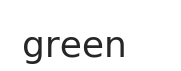

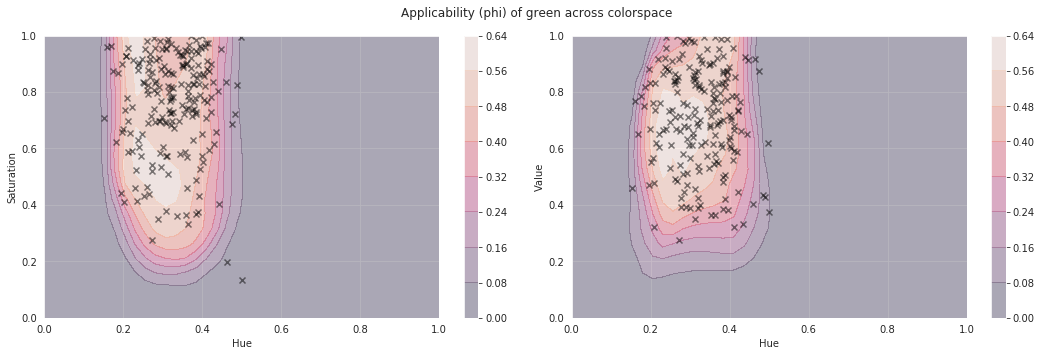

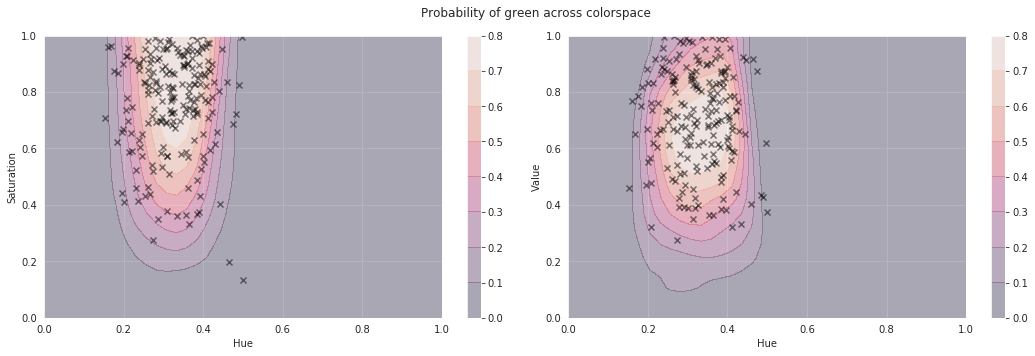

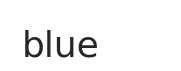

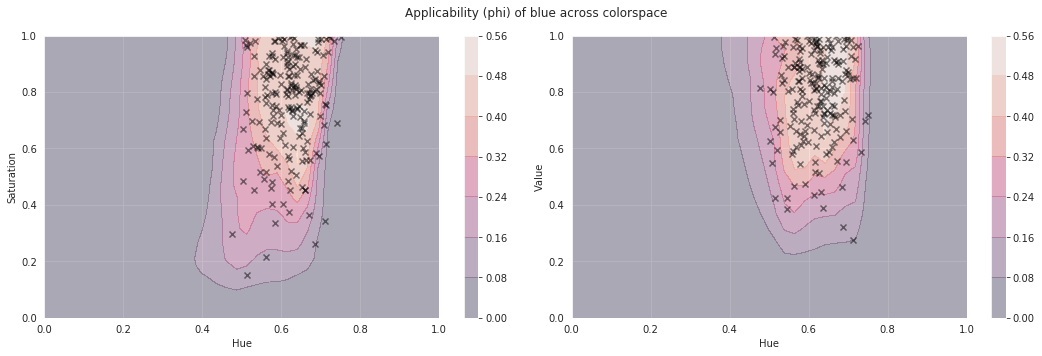

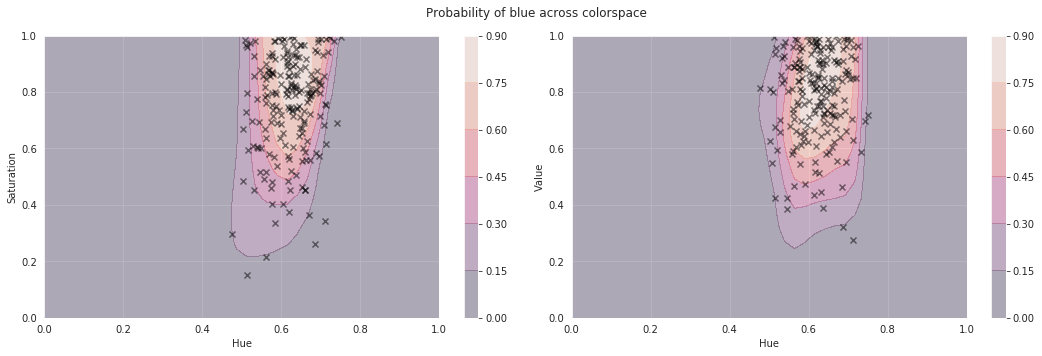

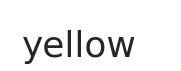

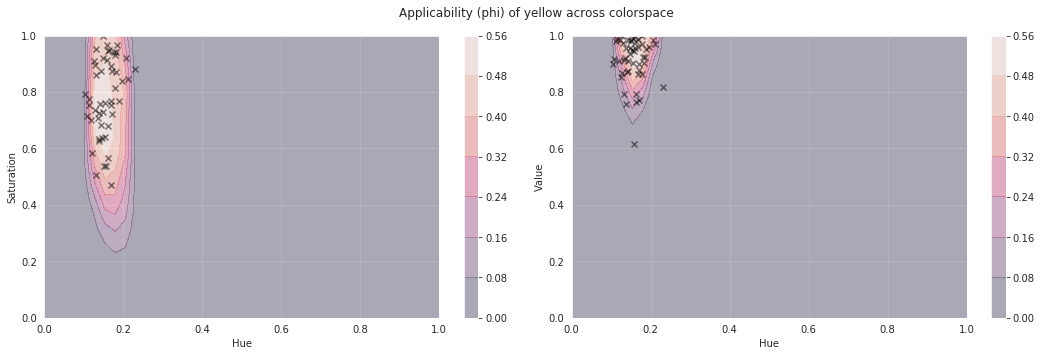

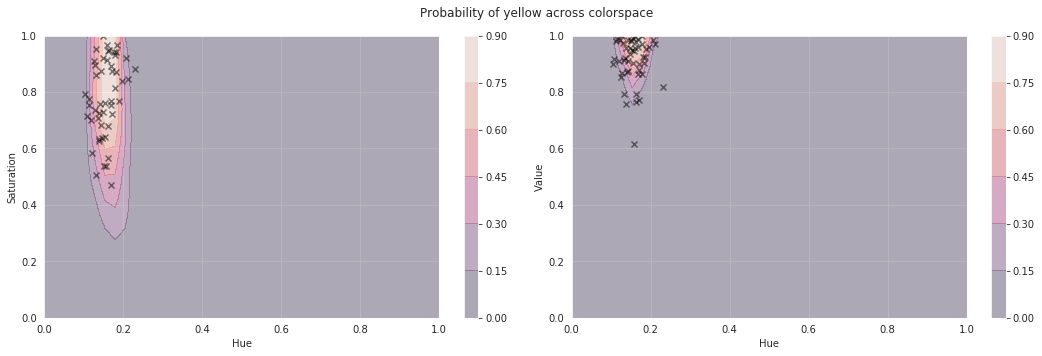

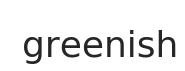

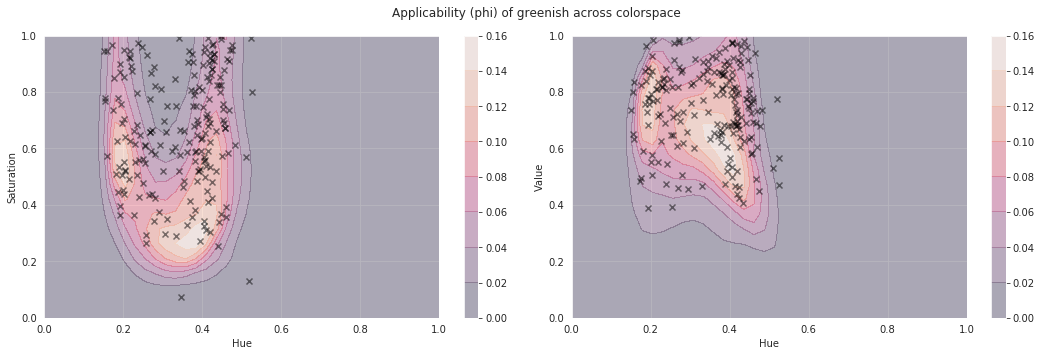

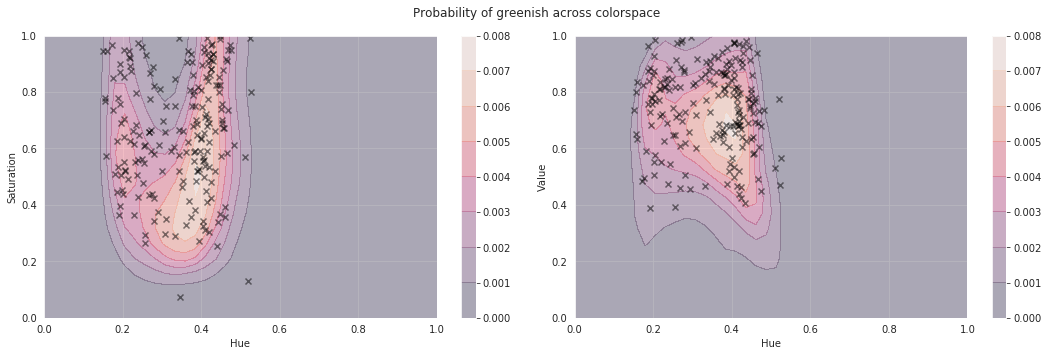

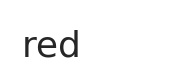

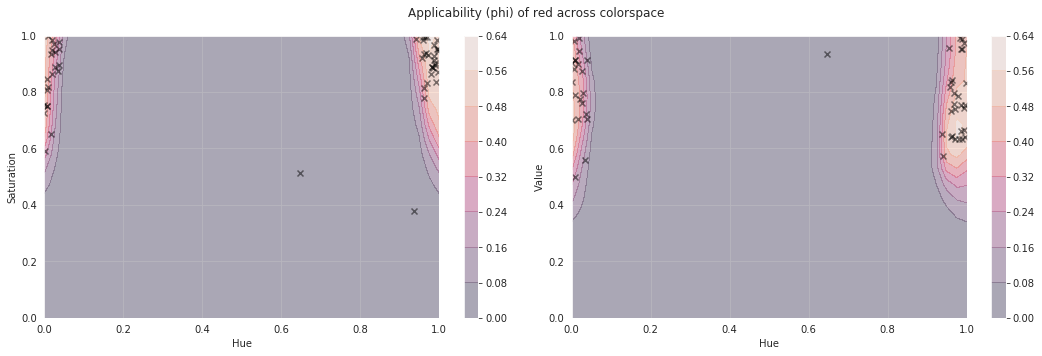

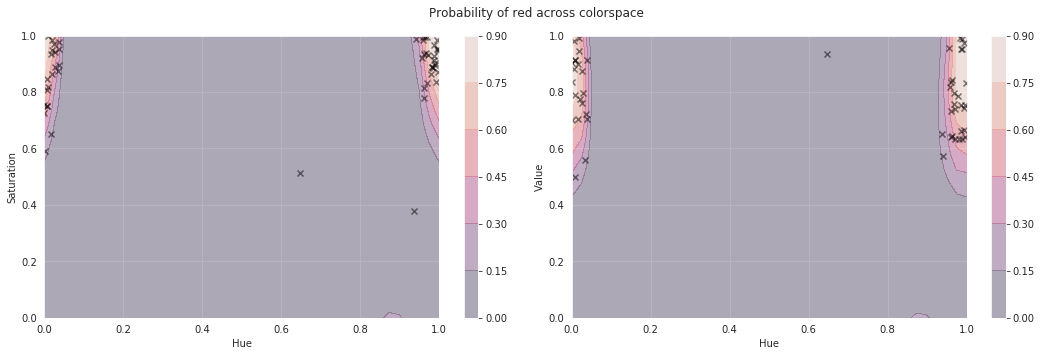

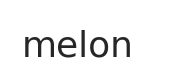

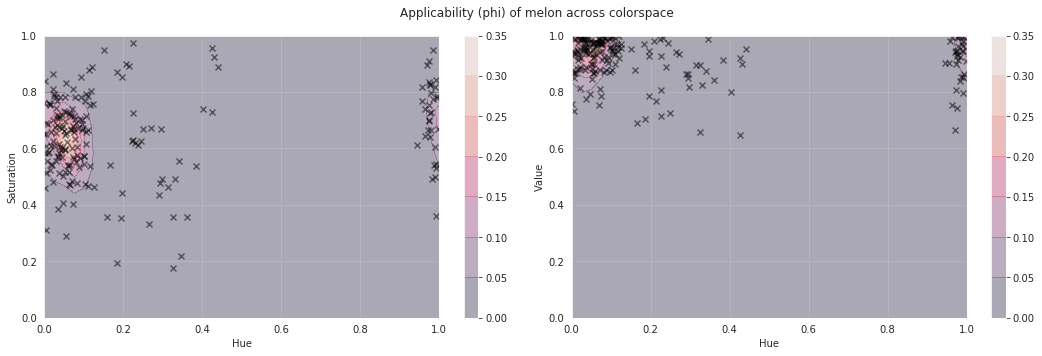

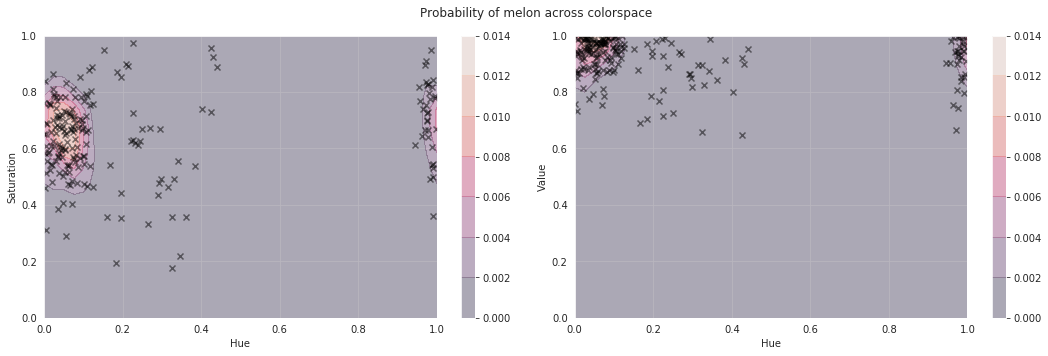

In [14]:
show_probes_with_kwargs(plotter0, probe_words_with_kwargs)

## Colorspace plots for the calibrated xkcd model

In [7]:
model1 = XKCDModel.from_pretrained(pretrained_index["CalibratedXKCDModel"])
plotter1 = ColorspacePlotter(model1, coordinate_system="fft")

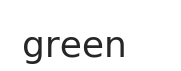

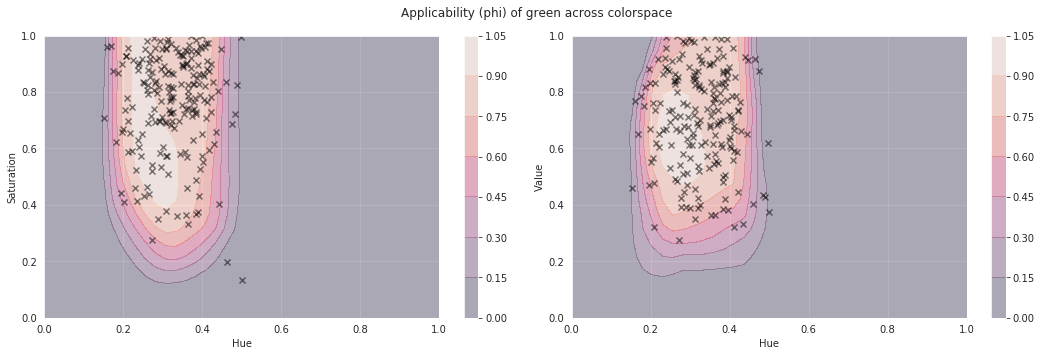

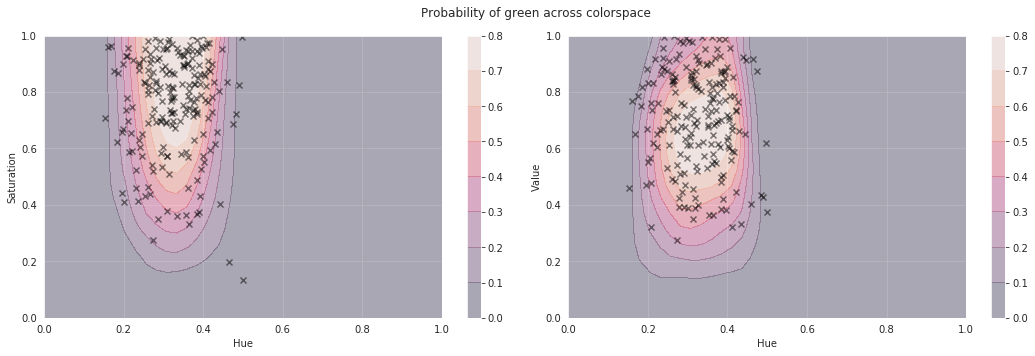

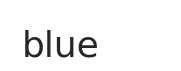

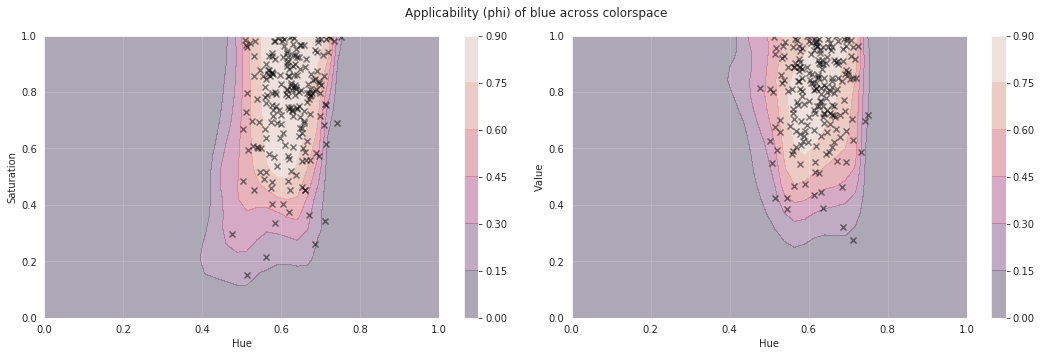

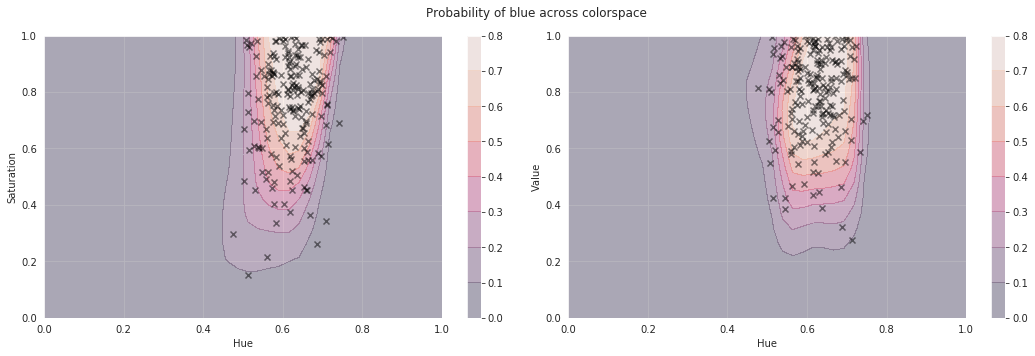

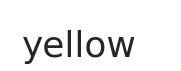

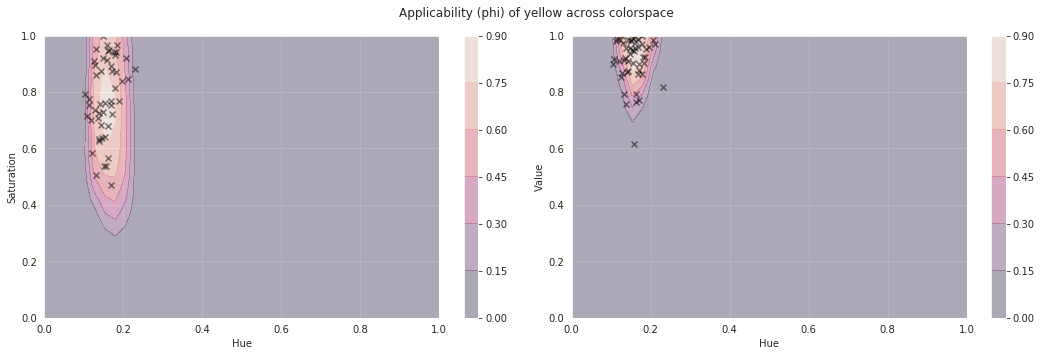

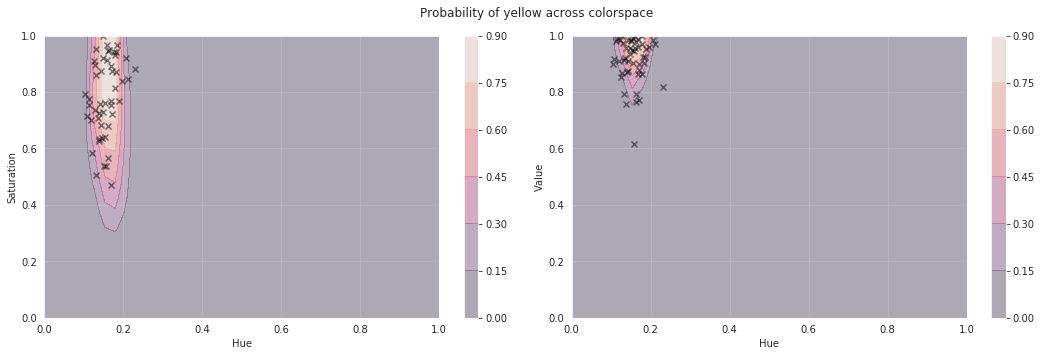

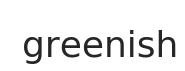

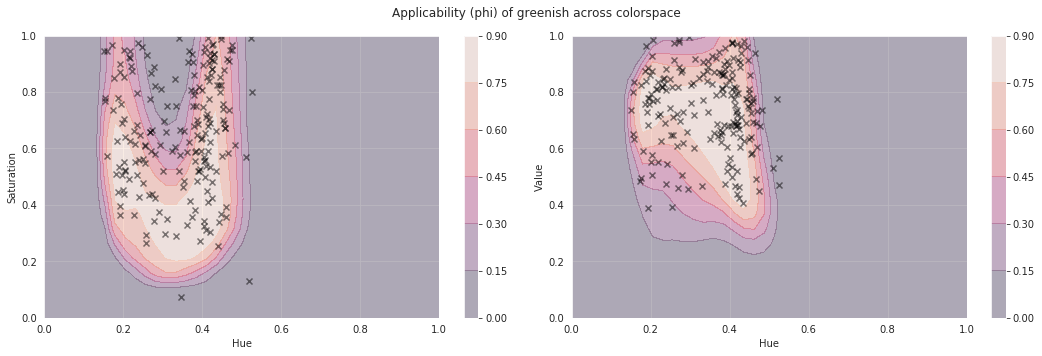

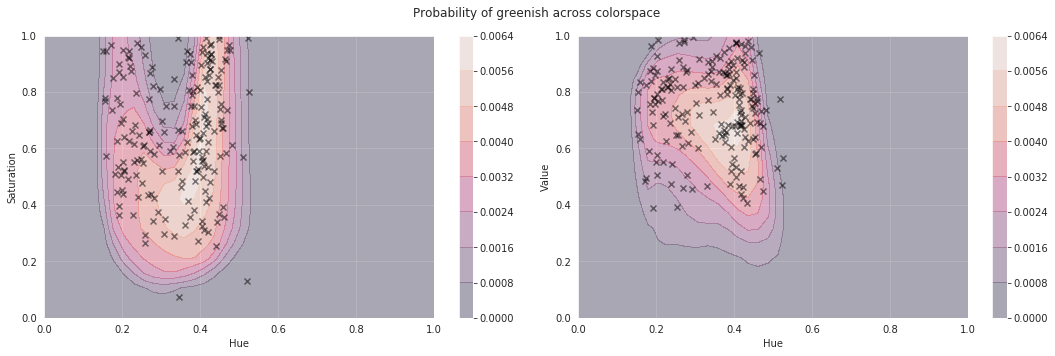

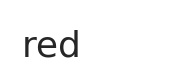

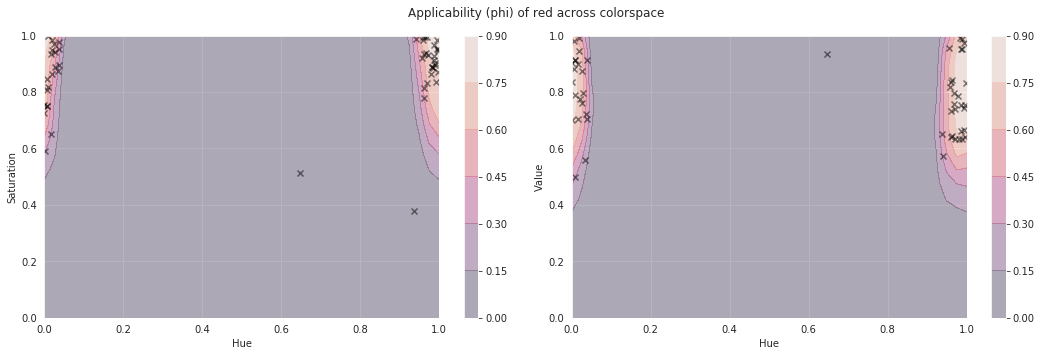

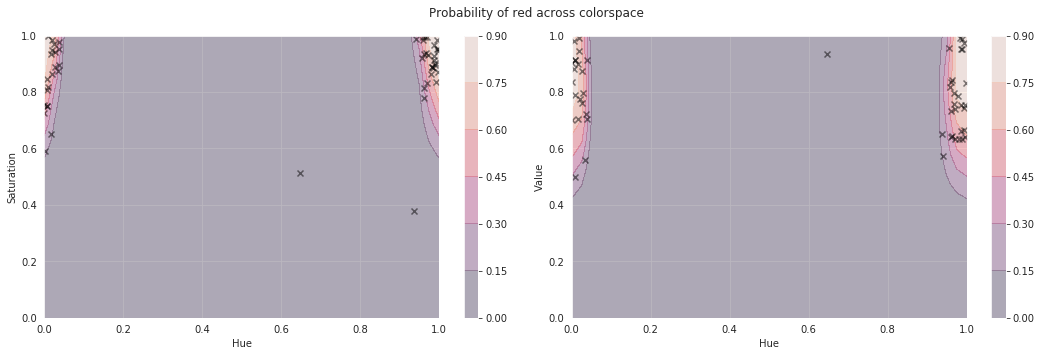

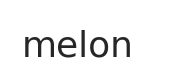

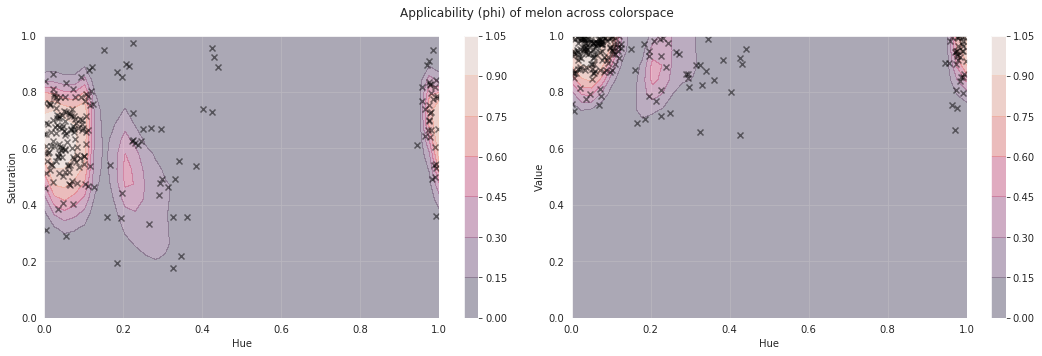

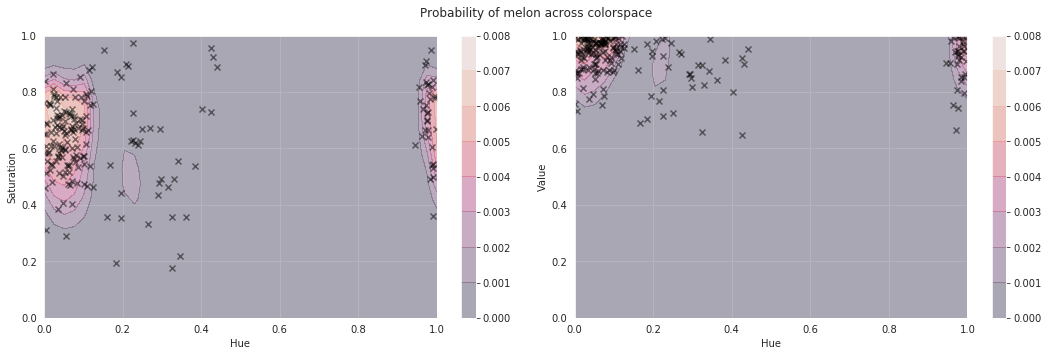

In [15]:
show_probes_with_kwargs(plotter1, probe_words_with_kwargs)